### タイタニック・データセットを決定木で分析

#### 共通事前処理

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.2f}'.format

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

### データ読み込み

In [3]:
url = 'https://raw.githubusercontent.com/makaishi2/sample-data/refs/heads/master/data/titanic_j.csv'
df = pd.read_csv(url)

In [4]:
display(df.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男子,デッキ,乗船港,生存可否,独身
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


### データ前処理

#### 欠損値を除去

In [5]:
# 欠損値を除去
df_clean = df[['生存', '等室', '年齢', '性別', '乗船港']].dropna()

display(df_clean.head())

,生存,等室,年齢,性別,乗船港
0,0,3,22.00,male,Southampton
1,1,1,38.00,female,Cherbourg
2,1,3,26.00,female,Southampton
3,1,1,35.00,female,Southampton
4,0,3,35.00,male,Southampton


#### エンコード

In [6]:
from sklearn.preprocessing import LabelEncoder
# カテゴリカル変数を数値に変換
label_encoders = {}
for column in ['性別', '乗船港']:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le

display(df_clean.head())

,生存,等室,年齢,性別,乗船港
0,0,3,22.00,1,2
1,1,1,38.00,0,0
2,1,3,26.00,0,2
3,1,1,35.00,0,2
4,0,3,35.00,1,2


#### 説明変数と目的変数を定義

In [7]:
X = df_clean[['等室', '年齢', '性別', '乗船港']]
y = df_clean['生存']

### モデル構築・分析

#### 決定木モデルを構築（深さ2）

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# 決定木モデルを構築（深さ2）
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

#### 決定木を可視化

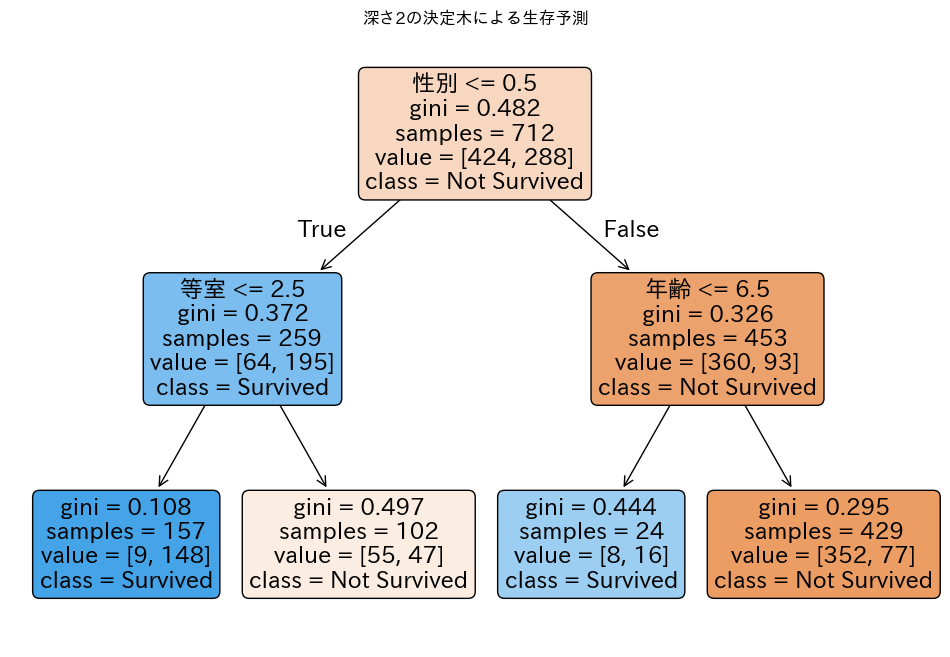

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title('深さ2の決定木による生存予測')
plt.show()